In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [5]:

folder = r"C:\Users\PC\Desktop\Datachallenge\Dataset"   
datasets = {}  

for file in os.listdir(folder):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder, file))
        datasets[file] = df  

C:\Users\PC\AppData\Local\Temp\ipykernel_48500\1089004864.py:6: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(folder, file))
C:\Users\PC\AppData\Local\Temp\ipykernel_48500\1089004864.py:6: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(folder, file))


In [6]:
train_input=datasets["train_input.csv"]
train_output=datasets["train_outputY.csv"]
test_input=datasets["test_input.csv"]

In [7]:
train_input.describe()


,ID,TYPERS,ANCIENNETE,CARACT2,DUREE_REQANEUF,CARACT5,TYPBAT2,DEROG15,CA1,CA2,...,RISK5,RISK7,EQUIPEMENT1,EQUIPEMENT3,EQUIPEMENT4,EQUIPEMENT6,EQUIPEMENT7,ZONE_VENT,ANNEE_ASSURANCE,ZONE
count,383610.000000,383610.000000,383610.000000,15326.000000,357037.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,...,357037.000000,357037.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,365028.00000,383610.000000,383610.000000
mean,191805.500000,1.665368,5.175517,1.019053,2.200483,0.076515,1.061711,99.997263,1047.396444,4.105732,...,448.326103,92.964861,0.074740,0.029454,0.899468,5.905349,6.851302,1.92568,0.701557,49.046876
std,110738.812719,0.471862,3.823097,0.136714,1.300343,0.420928,0.831133,0.286544,4777.346410,329.381340,...,494.892793,8.902888,0.262972,0.566816,0.300708,4.290611,4.329113,0.62817,0.352375,27.919867
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.002732,1.000000
25%,95903.250000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,100.000000,0.000000,0.000000,...,4.000000,90.000000,0.000000,0.000000,1.000000,3.000000,4.000000,2.00000,0.389041,25.000000
50%,191805.500000,2.000000,5.000000,1.000000,2.000000,0.000000,1.000000,100.000000,0.000000,0.000000,...,5.000000,100.000000,0.000000,0.000000,1.000000,5.000000,6.000000,2.00000,0.882192,49.000000
75%,287707.750000,2.000000,9.000000,1.000000,2.000000,0.000000,2.000000,100.000000,0.000000,0.000000,...,1000.000000,100.000000,0.000000,0.000000,1.000000,8.000000,9.000000,2.00000,1.000000,73.000000
max,383610.000000,2.000000,11.000000,2.000000,10.000000,20.000000,2.000000,100.000000,30000.000000,30000.000000,...,1000.000000,500.000000,1.000000,87.000000,1.000000,21.000000,21.000000,3.00000,2.000000,95.000000


In [8]:
train_input.shape

(383610, 374)

In [9]:
train_output.shape

(383610, 5)

In [10]:
test_input.shape

(95852, 374)

In [11]:
train_output.describe()

,ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE
count,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000
mean,191805.500000,0.012452,182.521632,0.701557,186.087058
std,110738.812719,0.357127,6699.967429,0.352375,6800.490328
min,1.000000,0.000000,-5751.000000,0.002732,-5751.000000
25%,95903.250000,0.000000,0.000000,0.389041,0.000000
50%,191805.500000,0.000000,0.000000,0.882192,0.000000
75%,287707.750000,0.000000,0.000000,1.000000,0.000000
max,383610.000000,182.499998,500000.000000,2.000000,552000.000000


In [12]:
test_input.describe()

,ID,TYPERS,ANCIENNETE,CARACT2,DUREE_REQANEUF,CARACT5,TYPBAT2,DEROG15,CA1,CA2,...,RISK5,RISK7,EQUIPEMENT1,EQUIPEMENT3,EQUIPEMENT4,EQUIPEMENT6,EQUIPEMENT7,ZONE_VENT,ANNEE_ASSURANCE,ZONE
count,95852.000000,95852.000000,95852.000000,3854.000000,89250.000000,95852.000000,95852.000000,95852.000000,95852.000000,95852.000000,...,89250.000000,89250.000000,95852.000000,95852.000000,95852.000000,95852.000000,95852.000000,91182.000000,95852.000000,95852.000000
mean,431536.500000,1.665004,5.182031,1.025428,2.203955,0.074605,1.060677,99.998122,994.684514,4.851229,...,449.412504,92.991485,0.074625,0.031152,0.899418,5.906940,6.851292,1.923219,0.700626,49.068710
std,27670.233338,0.471991,3.821911,0.157442,1.314381,0.403704,0.831064,0.237348,4644.584710,352.687273,...,495.008945,8.952182,0.262787,0.681513,0.300776,4.294386,4.332899,0.628184,0.353117,27.924648
min,383611.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.002732,1.000000
25%,407573.750000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,100.000000,0.000000,0.000000,...,4.000000,90.000000,0.000000,0.000000,1.000000,3.000000,4.000000,2.000000,0.386301,25.000000
50%,431536.500000,2.000000,5.000000,1.000000,2.000000,0.000000,1.000000,100.000000,0.000000,0.000000,...,5.000000,100.000000,0.000000,0.000000,1.000000,5.000000,6.000000,2.000000,0.876712,50.000000
75%,455499.250000,2.000000,9.000000,1.000000,2.000000,0.000000,2.000000,100.000000,0.000000,0.000000,...,1000.000000,100.000000,0.000000,0.000000,1.000000,8.000000,9.000000,2.000000,1.000000,73.000000
max,479462.000000,2.000000,11.000000,2.000000,10.000000,10.000000,2.000000,100.000000,30000.000000,30000.000000,...,1000.000000,500.000000,1.000000,87.000000,1.000000,21.000000,21.000000,3.000000,3.000000,95.000000


In [13]:
train_input.isnull().sum()

ID                      0
ACTIVIT2                0
VOCATION                0
TYPERS                  0
ANCIENNETE              0
                    ...  
RRAB_VOR_MMAX_A    217712
ANNEE_ASSURANCE         0
ESPINSEE           151542
AN_EXERC                0
ZONE                    0
Length: 374, dtype: int64

In [14]:
train_output.isnull().sum()

ID                 0
FREQ               0
CM                 0
ANNEE_ASSURANCE    0
CHARGE             0
dtype: int64

In [15]:
test_input.isnull().sum()

ID                     0
ACTIVIT2               0
VOCATION               0
TYPERS                 0
ANCIENNETE             0
                   ...  
RRAB_VOR_MMAX_A    54577
ANNEE_ASSURANCE        0
ESPINSEE           38026
AN_EXERC               0
ZONE                   0
Length: 374, dtype: int64

In [16]:
train_input.dtypes
train_input.isnull().mean()
train_output["FREQ"].describe()
train_output["CM"].describe()
train_output["CHARGE"].describe()


count    383610.000000
mean        186.087058
std        6800.490328
min       -5751.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      552000.000000
Name: CHARGE, dtype: float64

In [17]:
train_output["CHARGE_recalc"] = train_output["FREQ"] * train_output["CM"] *train_input["ANNEE_ASSURANCE"]
corr = train_output["CHARGE"].corr(train_output["CHARGE_recalc"])
print(corr)


1.0


In [55]:
X_train_all = train_input.copy() 

<Axes: >

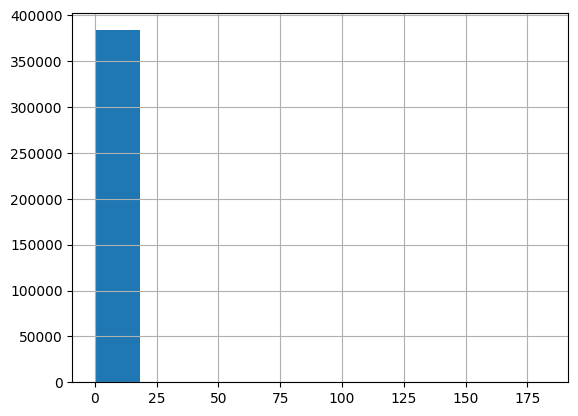

In [18]:

train_output["FREQ"].hist()


Beaucoup de zéros  (la plupart des exploitations n’ont jamais eu d’incendie)

In [19]:

numeric_columns = train_input.select_dtypes(include=['number']).columns
train_input[numeric_columns] = train_input[numeric_columns].fillna(0)



In [20]:
fill_cols = [item for item in train_input.columns if item not in numeric_columns]

train_input[fill_cols] = train_input[fill_cols].fillna(-999)



In [21]:
train_input = train_input.apply(lambda col: col.astype(str) if col.dtype == 'object' else col)
test_input = test_input.apply(lambda col: col.astype(str) if col.dtype == 'object' else col)


In [22]:
categorical_cols = fill_cols   
numeric_cols = [col for col in train_input.columns if col not in categorical_cols and col not in ["ID", "ANNEE_ASSURANCE"]]



In [23]:
X_train = train_input.drop(['ID'], axis=1)

In [24]:
X_train["log_expo"] = np.log(X_train["ANNEE_ASSURANCE"])


In [25]:
from category_encoders import CountEncoder

encoder = CountEncoder(cols=categorical_cols)
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)


In [26]:
X_train_enc = X_train_enc.drop(["ANNEE_ASSURANCE"], axis=1)


In [27]:
from sklearn.linear_model import TweedieRegressor

freq_model = TweedieRegressor(power=1, link="log")
freq_model.fit(X_train_enc, train_output["FREQ"])


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_glm\glm.py:286: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result(


,power,1
,alpha,1.0
,fit_intercept,True
,link,'log'
,solver,'lbfgs'
,max_iter,100
,tol,0.0001
,warm_start,False
,verbose,0


In [29]:

coeffs = pd.DataFrame({
    "variable": X_train_enc.columns,
    "coefficient": freq_model.coef_
}).sort_values(by="coefficient", ascending=False)

print(coeffs)


            variable  coefficient
63         KAPITAL26     0.000006
165     DISTANCE_322     0.000006
173     DISTANCE_411     0.000005
64         KAPITAL27     0.000005
37               CA3     0.000005
..               ...          ...
143     DISTANCE_122    -0.000004
137      EQUIPEMENT5    -0.000004
300   TNMAX_VOR_MM_A    -0.000004
209         LOG_APA3    -0.000005
270  NBJTNS25_MMAX_A    -0.000005

[373 rows x 2 columns]


In [30]:
print("Moyenne prédite :", freq_model.predict(X_train_enc).mean())
print("Moyenne réelle  :", train_output["FREQ"].mean())


Moyenne prédite : 0.012441957164884894
Moyenne réelle  : 0.012451818903775244


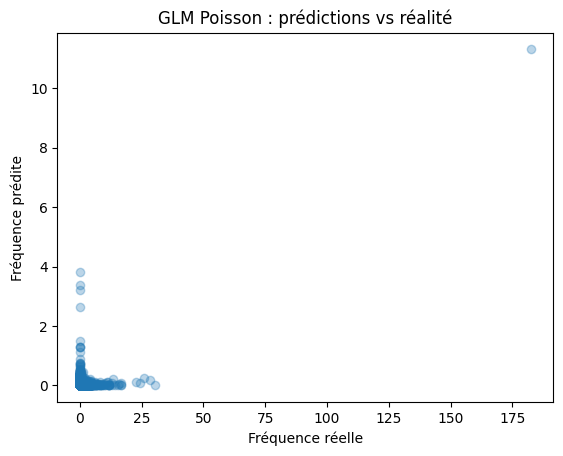

In [31]:
import matplotlib.pyplot as plt

plt.scatter(train_output["FREQ"], freq_model.predict(X_train_enc), alpha=0.3)
plt.xlabel("Fréquence réelle")
plt.ylabel("Fréquence prédite")
plt.title("GLM Poisson : prédictions vs réalité")
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

pred = freq_model.predict(X_train_enc)
rmse = np.sqrt(mean_squared_error(train_output["FREQ"], pred))
print("RMSE FREQ :", rmse)


RMSE FREQ : 0.34231939196901784


Calibration

In [44]:

resid = (train_output["FREQ"] - pred) / np.sqrt(pred)
print("Variance des résidus :", np.var(resid))



Variance des résidus : 2.971096231935263


Modèle surdispersionné Variance des résidus plus grand que 1. Tous les modèles de fréquence en assurance IARD sont sur-dispersés.Donc, logique.

In [28]:

X_test_prep = test_input.drop(["ID"], axis=1)
X_test_prep["log_expo"] = np.log(X_test_prep["ANNEE_ASSURANCE"])

X_test_enc = encoder.transform(X_test_prep)
X_test_enc = X_test_enc.drop(["ANNEE_ASSURANCE"], axis=1)


CM

In [47]:
X_train_cm = X_train_enc.drop(["log_expo"], axis=1)


In [50]:
mask = train_output["CM"] > 0

X_train_cm = X_train_enc.loc[mask].drop(["log_expo"], axis=1)
y_train_cm = train_output.loc[mask, "CM"]

cm_model = TweedieRegressor(
    power=1.5,
    alpha=0.0,
    link="log"
)

cm_model.fit(X_train_cm, y_train_cm)


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


,power,1.5
,alpha,0.0
,fit_intercept,True
,link,'log'
,solver,'lbfgs'
,max_iter,100
,tol,0.0001
,warm_start,False
,verbose,0


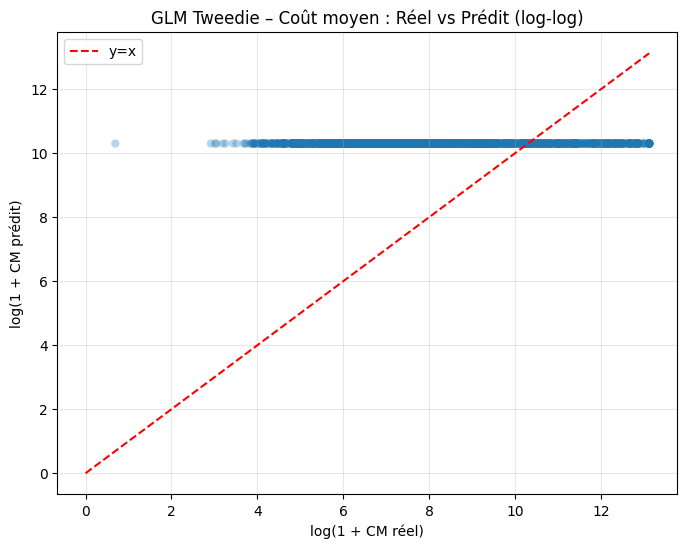

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Valeurs réelles et prédites uniquement pour les sinistrés
y_true_cm = y_train_cm.values
y_pred_cm = cm_model.predict(X_train_cm)

plt.figure(figsize=(8,6))

plt.scatter(
    np.log1p(y_true_cm),
    np.log1p(y_pred_cm),
    alpha=0.3,
    color="#1f77b4",
    edgecolors="none"
)

maxv = max(np.max(np.log1p(y_true_cm)), np.max(np.log1p(y_pred_cm)))
plt.plot([0, maxv], [0, maxv], 'r--', label="y=x")

plt.xlabel("log(1 + CM réel)")
plt.ylabel("log(1 + CM prédit)")
plt.title("GLM Tweedie – Coût moyen : Réel vs Prédit (log-log)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [52]:
from sklearn.metrics import mean_squared_error

rmse_cm = np.sqrt(mean_squared_error(y_true_cm, y_pred_cm))
print("RMSE du modèle CM :", rmse_cm)


RMSE du modèle CM : 80251.44700939476


In [56]:
freq_pred = freq_model.predict(X_train_enc)


In [57]:
import numpy as np

cm_pred = np.zeros(len(X_train_enc))
cm_pred[mask] = cm_model.predict(X_train_cm)


In [58]:
annees = X_train_all["ANNEE_ASSURANCE"].values


In [60]:
charge_pred = freq_pred * cm_pred * annees
charge_pred


array([0., 0., 0., ..., 0., 0., 0.])

In [62]:
charge_true = train_output["CHARGE"].values
charge_true


array([0., 0., 0., ..., 0., 0., 0.])

In [63]:
from sklearn.metrics import mean_squared_error

rmse_charge = np.sqrt(mean_squared_error(charge_true, charge_pred))
print("RMSE FINAL (CHARGE) :", rmse_charge)


RMSE FINAL (CHARGE) : 6786.4948503841515


ML

In [88]:
# 1. Conversion en float propre
y = pd.to_numeric(train_output["CHARGE"], errors="coerce")

# 2. Remplacer inf et -inf par NaN
y = y.replace([np.inf, -np.inf], np.nan)

# 3. Remplacer les NaN restants (s’il en reste)
y = y.fillna(0)

# 4. Plancher à 0 (prévient les NaN dans log1p)
y = y.clip(lower=0)

# 5. Transformation log pour stabiliser la variance
y_log = np.log1p(y)



In [90]:
print(len(X_train_enc), len(y_log))
print(X_train_enc.index.equals(y_log.index))


383610 383610
True


In [105]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_enc, y_log,
    test_size=0.2,
    random_state=42
)

from sklearn.ensemble import HistGradientBoostingRegressor

cm_model_ml = HistGradientBoostingRegressor(
    max_depth=6,
    learning_rate=0.05,
    max_iter=300,
    loss="squared_error"
)

cm_model_ml.fit(X_tr, y_tr)



,loss,'squared_error'
,quantile,None
,learning_rate,0.05
,max_iter,300
,max_leaf_nodes,31
,max_depth,6
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'


In [ ]:

X_train_cm = X_train_enc.loc[mask, cm_model_ml.feature_names_in_]

cm_pred_ml = np.zeros(len(X_train_enc))
cm_pred_ml[mask] = cm_model_ml.predict(X_train_cm)

# 3. CM >= 0
cm_pred_ml = np.clip(cm_pred_ml, 0, None)


In [ ]:

y_val_pred_log = cm_model_ml.predict(X_val)
y_val_pred = np.expm1(y_val_pred_log)  

rmse = np.sqrt(mean_squared_error(np.expm1(y_val), y_val_pred))
print("RMSE pour CM :", rmse)


RMSE pour CM : 7045.245174308711


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np

y_freq = train_output["FREQ"].astype(float)

X_tr_f, X_val_f, y_tr_f, y_val_f = train_test_split(
    X_train_enc, y_freq,
    test_size=0.2,
    random_state=42
)

# Modèle ML pour la fréquence
freq_model_ml = HistGradientBoostingRegressor(
    loss="squared_error",
    max_iter=300,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

freq_model_ml.fit(X_tr_f, y_tr_f)

print("Modèle ML FREQ entraîné.")


Modèle ML FREQ entraîné.


In [ ]:
freq_pred_ml = freq_model_ml.predict(X_train_enc)
freq_pred_ml = np.clip(freq_pred_ml, 0, None)


In [116]:
annees = X_train_all["ANNEE_ASSURANCE"].values

charge_pred_ml = freq_pred_ml * cm_pred_ml * annees


charge_pred_ml = np.clip(charge_pred_ml, 0, None)
charge_pred_ml


array([0., 0., 0., ..., 0., 0., 0.])

In [117]:
from sklearn.metrics import mean_squared_error

charge_true = train_output["CHARGE"].values

rmse_ml_final = np.sqrt(mean_squared_error(charge_true, charge_pred_ml))
print("RMSE FINAL ML :", rmse_ml_final)


RMSE FINAL ML : 6803.026790668556


Model mauvais

XGBOOST

In [119]:
from xgboost import XGBRegressor
import numpy as np

# Features CM : sinistrés uniquement
X_train_cm_xgb = X_train_enc.loc[mask]
y_train_cm_xgb = train_output.loc[mask, "CM"].values

# Modèle XGBoost pour le CM
cm_model_xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

cm_model_xgb.fit(X_train_cm_xgb, y_train_cm_xgb)

print("XGBoost CM entraîné.")


XGBoost CM entraîné.


In [120]:
cm_pred_ml_xgb = np.zeros(len(X_train_enc))
cm_pred_ml_xgb[mask] = cm_model_xgb.predict(X_train_cm_xgb)

cm_pred_ml_xgb = np.clip(cm_pred_ml_xgb, 0, None)


In [121]:
# Cible fréquence
y_freq = train_output["FREQ"].astype(float)

freq_model_xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

freq_model_xgb.fit(X_train_enc, y_freq)

print("XGBoost FREQ entraîné.")


XGBoost FREQ entraîné.


In [122]:
freq_pred_ml_xgb = freq_model_xgb.predict(X_train_enc)
freq_pred_ml_xgb = np.clip(freq_pred_ml_xgb, 0, None)


In [123]:
annees = X_train_all["ANNEE_ASSURANCE"].values

charge_pred_ml_xgb = freq_pred_ml_xgb * cm_pred_ml_xgb * annees
charge_pred_ml_xgb = np.clip(charge_pred_ml_xgb, 0, None)


In [124]:
from sklearn.metrics import mean_squared_error

charge_true = train_output["CHARGE"].values

rmse_xgb = np.sqrt(mean_squared_error(charge_true, charge_pred_ml_xgb))
print("RMSE FINAL ML (XGBoost) :", rmse_xgb)


RMSE FINAL ML (XGBoost) : 6480.368946196055


XGBOOST Mieux